# Advanced Model Insights

This notebook has most of the contents stripped out to track down nbsphinx issues.

## Prerequisites
In order to run this notebook yourself, you will need the following:

- To go to the version of the notebook I didn't strip important things out of

## Feature Impact

Feature Impact is available for all model types and works by altering input data and observing the effect on a model's score. It is an on-demand feature, meaning that you must initiate a calculation to see the results. Once you have had DataRobot compute the feature impact for a model, that information is saved with the project.

Feature Impact measures how important a feature is in the context of a model. That is, it measures how much the accuracy of a model would decrease if that feature were removed.

In [9]:
feature_impacts = model.get_or_request_feature_impact()

Text(0.5,1.04,'Feature Impact')

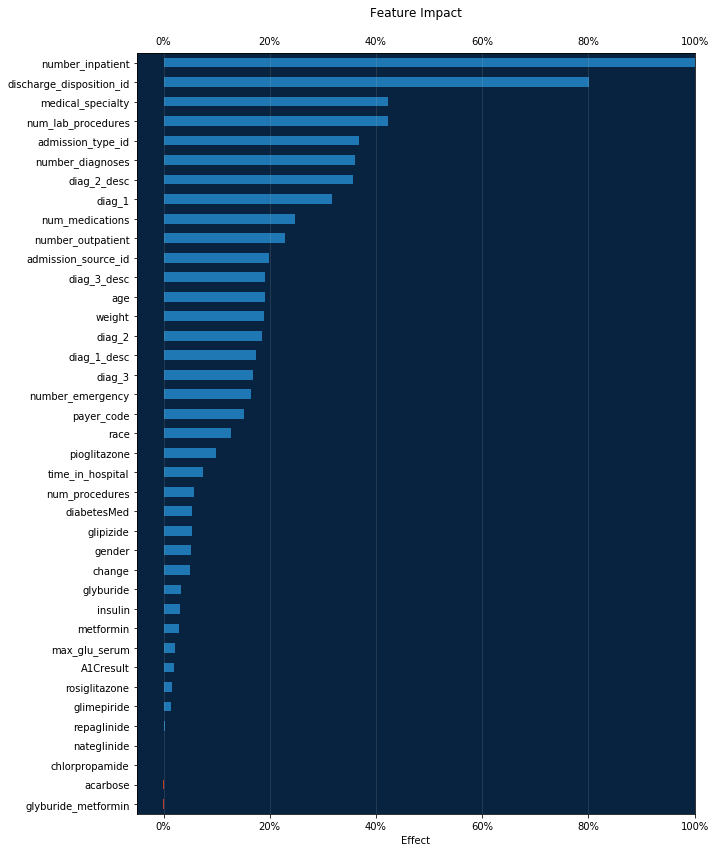

In [10]:
# Formats the ticks from a float into a percent
percent_tick_fmt = mtick.PercentFormatter(xmax=1.0)

impact_df = pd.DataFrame(feature_impacts)
impact_df.sort_values(by='impactNormalized', ascending=True, inplace=True)

# Positive values are blue, negative are red
bar_colors = impact_df.impactNormalized.apply(lambda x: dr_red if x < 0
                                              else dr_blue)

ax = impact_df.plot.barh(x='featureName', y='impactNormalized',
                         legend=False,
                         color=bar_colors,
                         figsize=(10, 14))
ax.xaxis.set_major_formatter(percent_tick_fmt)
ax.xaxis.set_tick_params(labeltop=True)
ax.xaxis.grid(True, alpha=0.2)
ax.set_facecolor(dr_dark_blue)

plt.ylabel('')
plt.xlabel('Effect')
plt.xlim((None, 1))  # Allow for negative impact
plt.title('Feature Impact', y=1.04)

AND THIS IS MISSING